### Computational Tests

This notebook is intended for running different kinds of analyses that would validate our reconstruction and would compare it woth previous CHO Recons

In [1]:
from cobra.io import load_json_model
import pandas as pd

import utils
from utils import detect_dead_ends

# model = read_sbml_model('iCHOv3_CHO_05072023.xml')
model = load_json_model('iCHOv3_CHO_27072023.json')
model

Set parameter Username
Academic license - for non-commercial use only - expires 2024-03-24


Name,iCHO
Memory address,1062d8760
Number of metabolites,7760
Number of reactions,11487
Number of genes,3145
Number of groups,0
Objective expression,1.0*biomass - 1.0*biomass_reverse_01e59
Compartments,"c, l, m, e, r, x, n, g, im, i"


### Blocked reactions and Dead-End metabolites

In [41]:
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

In [2]:
##### ----- FVA ----- #####
import utils

model.solver = 'gurobi'


for rxn_exchange in model.exchanges:
    rxn_exchange.bounds = (-1000, 1000)
minmax = utils.runMinMax_Single(model, end_rxn_index=None)

##### Print Reactions with the min and max fluxes #####
with open('FVA_Results.txt', 'w') as f:
    for i, j in enumerate(minmax):
        print(model.reactions[i].id, "Min: ",j[0], "Max: ", j[1], file=f)
        
##### Print Blocked Reactions #####
with open('Blocked_Reactions.txt', 'w') as f:
    for i, j in enumerate(minmax):
        if j[0] == 0 and j[1] == 0:
            print(model.reactions[i].id, "Min: ",j[0], "Max: ", j[1], file=f)

500 reactions analized
1000 reactions analized
1500 reactions analized
2000 reactions analized
2500 reactions analized
3000 reactions analized
3500 reactions analized
4000 reactions analized
4500 reactions analized
5000 reactions analized
5500 reactions analized
6000 reactions analized
6500 reactions analized
7000 reactions analized
7500 reactions analized
8000 reactions analized
8500 reactions analized
9000 reactions analized
9500 reactions analized
10000 reactions analized
10500 reactions analized
11000 reactions analized


In [3]:
##### ----- Print the amount and % of blocked reactions ----- #####
blocked_reactions = []
for i, j in enumerate(minmax):
        if j[0] == 0 and j[1] == 0:
            blocked_reactions.append(model.reactions[i].id)
            
print('##### ----- Blocked Reactions ----- #####')
print(f'The model has {len(model.reactions)} total reactions')
print(f'The model has {len(blocked_reactions)} ({round(len(blocked_reactions)/len(model.reactions)*100)}%) blocked reactions')

##### ----- Blocked Reactions ----- #####
The model has 11487 total reactions
The model has 2812 (24%) blocked reactions


In [59]:
blocked_reactions

['1a_24_25VITD3Hm',
 '1a_25VITD3Hm',
 '25VITD3Hm',
 '2H3MVc',
 '2HIVc',
 '2M3OVCOAm',
 '34DHPHAte',
 '34HPPYRI',
 '3DHCAS',
 '3DHCDCAS',
 '3DHDCAS',
 '3DHLCAS',
 '3HAD183n3p',
 '3HAD40m',
 '3HAPD100m',
 '3HAPD120m',
 '3HAPD140m',
 '3HAPD60m',
 '3HAPD80m',
 '3HBCOARtc',
 '3HDH183n3p',
 '3HPRODHx',
 '3HXKYNDCL',
 '3HXKYNOXDA',
 '3OAR100m',
 '3OAR120m',
 '3OAR140m',
 '3OAR40m',
 '3OAR60m',
 '3OAR80m',
 '3OAS100m',
 '3OAS120m',
 '3OAS140m',
 '3OAS60m',
 '3OAS80m',
 '3OHGLUTACOAT3t',
 '3OHSEBCOAx',
 '3OHSUBCOAx',
 '4ABUTtcn',
 '4MPTNLtr',
 '5G2OXPTtx',
 '5HOXINDACTOXm',
 '5HOXINDOAtr',
 '5HTRPDOX',
 '5HXKYNDCL',
 '5HXKYNOXDA',
 'A4GNT2g',
 'ABUTt2rL',
 'ACACT183n3p',
 'ACALDtr',
 'ACER12r',
 'ACER22g',
 'ACER23g',
 'ACER31r',
 'ACGPID',
 'ACMAT1m',
 'ACNAM9PL2',
 'ACNAO',
 'ACOAD163n3p',
 'ACOAD181m',
 'ACOATAm',
 'ACOATE100p',
 'ACOATE120m',
 'ACOATE120p',
 'ACOATE140m',
 'ACOATE160m',
 'ACOATE1811m',
 'ACOATE1812m',
 'ACOATE1831m',
 'ACOATE1832m',
 'ACOATE184m',
 'ACOATE203',
 'ACOATE223'

In [44]:
#### --- Calculate the parcentage of blocked reactions per Subsystem ---- ####
blocked_subs = []
for blocked in blocked_reactions:
    blocked_rxn = model.reactions.get_by_id(blocked)
    blocked_subs.append(blocked_rxn.subsystem)
    
counter_blocked = Counter(blocked_subs)

all_subs = []
for rxn in model.reactions:
    all_subs.append(rxn.subsystem)
counter_all = Counter(all_subs)
counter_all

# calculating percentages
percentages = {}

for subsystem in counter_all.keys():
    if subsystem in counter_blocked:
        percentages[subsystem] = (counter_blocked[subsystem] / counter_all[subsystem]) * 100
    else:
        percentages[subsystem] = 0

for k, v in percentages.items():
    print(f"{k}: {v}%")

TRANSPORT, LYSOSOMAL: 19.090909090909093%
TRANSPORT, MITOCHONDRIAL: 7.068062827225131%
TRANSPORT, EXTRACELLULAR: 18.23238566131026%
TRANSPORT, ENDOPLASMIC RETICULAR: 32.958801498127336%
TRANSPORT: 5.555555555555555%
BETA-ALANINE METABOLISM: 15.384615384615385%
BILE, EICOSANOID AND STEROID METABOLISM: 3.225806451612903%
LYSINE METABOLISM: 58.82352941176471%
TRANSPORT, NUCLEAR: 26.08695652173913%
VITAMIN D METABOLISM: 67.64705882352942%
STEROID METABOLISM: 25.663716814159294%
PURINE CATABOLISM: 16.666666666666664%
GLYCINE, SERINE, ALANINE AND THREONINE METABOLISM: 0%
METHIONINE AND CYSTEINE METABOLISM: 30.23255813953488%
EXCHANGE: 10.606060606060606%
PYRIMIDINE CATABOLISM: 5.714285714285714%
VALINE, LEUCINE, AND ISOLEUCINE METABOLISM: 19.51219512195122%
PROPANOATE METABOLISM: 28.57142857142857%
TRYPTOPHAN METABOLISM: 36.36363636363637%
TYROSINE METABOLISM: 51.14503816793893%
AMINO ACID METABOLISM: 14.583333333333334%
UBIQUINONE SYNTHESIS: 17.391304347826086%
BILE ACID SYNTHESIS: 36.91588

In [45]:
icho1766_icho2101 = pd.read_excel('../Data/Reconciliation/datasets/iCHO2101.xlsx', 'Supplementary Table 9', header = 1)
icho1766_icho2101['Name of the metabolic pathway'] = icho1766_icho2101['Name of the metabolic pathway'].str.replace("'","")
# Now converting the dataframe to dictionary
data_dict = icho1766_icho2101[['Percent of blockage in iCHO1766', 'Percent of blockage in iCHO2101']].to_dict()
pathway_names = list(icho1766_icho2101['Name of the metabolic pathway'])

# your original dictionaries
blockage_iCHO1766 = data_dict['Percent of blockage in iCHO1766']
blockage_iCHO2101 = data_dict['Percent of blockage in iCHO2101']

# initialize new dictionaries
new_blockage_iCHO1766 = {}
new_blockage_iCHO2101 = {}

# fill the new dictionaries with the correct keys
for i, pathway in enumerate(pathway_names):
    new_blockage_iCHO1766[pathway] = blockage_iCHO1766[i]
    new_blockage_iCHO2101[pathway] = blockage_iCHO2101[i]

In [46]:
new_blockage_iCHO2101

{'ALKALOID SYNTHESIS': 42.857142857142854,
 'ARGININE AND PROLINE METABOLISM': 3.8461538461538463,
 'CYP METABOLISM': 100.0,
 'CYTOCHROME METABOLISM': 6.25,
 'FATTY ACID ELONGATION': 30.0,
 'FATTY ACID METABOLISM': 0.0,
 'GLYCOSYLPHOSPHATIDYLINOSITOL (GPI)-ANCHOR BIOSYNTHESIS': 37.5,
 'GLYOXYLATE AND DICARBOXYLATE METABOLISM': 11.76470588235294,
 'LIMONENE AND PINENE DEGRADATION': 0.0,
 'METHIONINE METABOLISM': 0.0,
 'N-GLYCAN SYNTHESIS': 27.27272727272727,
 'PHENYLALANINE METABOLISM': 0.0,
 'PROPANOATE METABOLISM': 15.384615384615385,
 'TRANSPORT, EXTRACELLULAR': 0.5438477226376615,
 'UREA CYCLE/AMINO GROUP METABOLISM': 0.0,
 'VITAMIN B12 METABOLISM': 0.0,
 'VITAMIN C METABOLISM': 13.333333333333334,
 'VITAMIN D': 0.0,
 'AMINO ACID DERIVATIVE': 0.0,
 'ARACHIDONIC ACID METABOLISM': 56.75675675675676,
 'ASCORBATE AND ALDARATE METABOLISM': 0.0,
 'BILE ACID SYNTHESIS': 6.363636363636363,
 'CHOLESTEROL METABOLISM': 10.714285714285714,
 'CHONDROITIN SYNTHESIS': 0.0,
 'COA CATABOLISM': 0.0,


In [53]:
# initialize lists to hold subsystems with lower and higher values in percentages_filtered
lower_subsystems = []
higher_subsystems = []

# loop through each subsystem
for subsystem in pathway_names:
    # get the value from each dictionary, or default to 0 if the subsystem is not present
    value_percentages = percentages.get(subsystem, 0)
    value_iCHO1766 = new_blockage_iCHO1766.get(subsystem, 0)
    value_iCHO2101 = new_blockage_iCHO2101.get(subsystem, 0)
    
    # check if value_percentages_filtered is lower than both of the other values
    if value_percentages < min(value_iCHO1766, value_iCHO2101):
        lower_subsystems.append(subsystem)
    
    # check if value_percentages_filtered is higher than both of the other values
    if value_percentages > max(value_iCHO1766, value_iCHO2101):
        higher_subsystems.append(subsystem)

# print the results
print("Subsystems where 'percentages_filtered' is lower:")
for subsystem in lower_subsystems:
    print(subsystem)

print("\nSubsystems where 'percentages_filtered' is higher:")
for subsystem in higher_subsystems:
    print(subsystem)


Subsystems where 'percentages_filtered' is lower:
N-GLYCAN SYNTHESIS
GALACTOSE METABOLISM
TRANSPORT, GOLGI APPARATUS
TRIACYLGLYCEROL SYNTHESIS
XENOBIOTICS METABOLISM
NUCLEOTIDE INTERCONVERSION
NUCLEOTIDES
PENTOSE AND GLUCURONATE INTERCONVERSIONS
GLYCINE, SERINE, ALANINE AND THREONINE METABOLISM
GLYCOSPHINGOLIPID METABOLISM
PYRUVATE METABOLISM

Subsystems where 'percentages_filtered' is higher:
CYTOCHROME METABOLISM
GLYCOSYLPHOSPHATIDYLINOSITOL (GPI)-ANCHOR BIOSYNTHESIS
LIMONENE AND PINENE DEGRADATION
METHIONINE METABOLISM
PHENYLALANINE METABOLISM
PROPANOATE METABOLISM
TRANSPORT, EXTRACELLULAR
CHOLESTEROL METABOLISM
COA CATABOLISM
FRUCTOSE AND MANNOSE METABOLISM
N-GLYCAN BIOSYNTHESIS
PHOSPHATIDYLINOSITOL PHOSPHATE METABOLISM
PYRIMIDINE SYNTHESIS
SPHINGOLIPID METABOLISM
VITAMIN A METABOLISM
HISTIDINE METABOLISM
LYSINE METABOLISM
METHIONINE AND CYSTEINE METABOLISM
VALINE, LEUCINE, AND ISOLEUCINE METABOLISM
AMINOSUGAR METABOLISM
COA SYNTHESIS
FOLATE METABOLISM
GLYCEROPHOSPHOLIPID METABOLIS

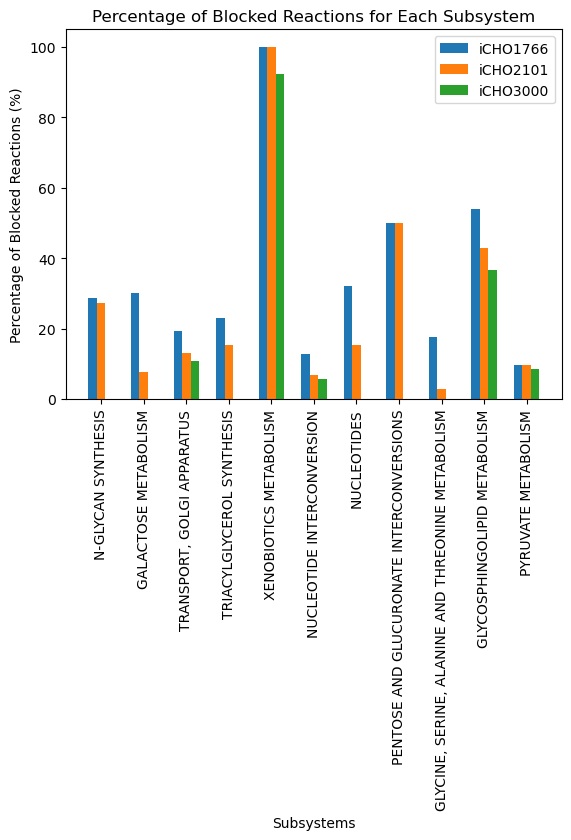

In [58]:
import numpy as np
import matplotlib.pyplot as plt

# List of subsystems for which we want to plot histogram
subsystems = lower_subsystems

# Create new lists with the percentages for each subsystem in each dictionary
values_icho1766 = [new_blockage_iCHO1766.get(subsystem, 0) for subsystem in subsystems]
values_icho2101 = [new_blockage_iCHO2101.get(subsystem, 0) for subsystem in subsystems]
percentages_values = [percentages.get(subsystem, 0) for subsystem in subsystems]

# Define the width of each bar and the positions of the bars
bar_width = 0.2
index = np.arange(len(subsystems))

# Create the bar plot
fig, ax = plt.subplots()

bar1 = ax.bar(index, values_icho1766, bar_width, label='iCHO1766')
bar2 = ax.bar(index + bar_width, values_icho2101, bar_width, label='iCHO2101')
bar3 = ax.bar(index + 2*bar_width, percentages_values, bar_width, label='iCHO3000')

ax.set_xlabel('Subsystems')
ax.set_ylabel('Percentage of Blocked Reactions (%)')
ax.set_title('Percentage of Blocked Reactions for Each Subsystem')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(subsystems, rotation=90)
ax.legend()

plt.show()


In [ ]:
##### ----- Detect Dead-Ends ----- #####
model.solver = 'gurobi'  #change 'gurobi' for 'glpk'
dead_ends = detect_dead_ends(model)

with open('Dead_ends.txt', 'w') as f:
    for i,j in enumerate(dead_ends):
        if j:
            print(model.metabolites[i], file=f)
            
rxn_c = 0
met_c = 0
for i,j in enumerate(dead_ends):
    if j:
        met_c += 1
        print("\n", model.metabolites[i],": ")
        for met_rxn in model.metabolites[i].reactions:
            rxn_c += 1
            print(met_rxn)
            print(rxn_c)

print(f'Percentage of Dead-End metabolites is {round(met_c/len(model.metabolites)*100)}%' )

#### Auxotrophies

#### Matrix Sparsity

#### Gene Deletion test

##### Essential for growth genes and comparison to (An optimised genome-wide, virus free CRISPR screen for mammalian cells)

##### Commparsion to other models

#### Biomass prediction using exp. data (TODO)